In [3]:
import numpy as np
from numpy import newaxis
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, BatchNormalization, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_excel("/content/dataset_input1.xlsx", sheet_name="Sheet1")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
n_features = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], n_features, 1)
X_val = X_val.reshape(X_val.shape[0], n_features, 1)
X_test = X_test.reshape(X_test.shape[0], n_features, 1)
print("X_train shape:", X_train.shape)  # Check the shape of X_train
print("X_train shape after reshaping:", X_train.shape)

X_train shape: (5517, 25, 1)
X_train shape after reshaping: (5517, 25, 1)


In [36]:
Test Loss: 13.853096008300781
model = Sequential()
model.add(Input(shape=(n_features, 1)))
model.add(Conv1D(32, kernel_size=3, activation="relu", padding = 'same'))
model.add(Conv1D(64, kernel_size=2, activation="relu", padding = 'same'))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(128, kernel_size=1, activation="relu", padding = 'same'))
model.add(MaxPool1D(pool_size=1))
model.add(Conv1D(64, kernel_size=2, activation="relu", padding = 'same'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation="relu"))
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_65 (Conv1D)          (None, 25, 32)            128       
                                                                 
 conv1d_66 (Conv1D)          (None, 25, 128)           8320      
                                                                 
 max_pooling1d_33 (MaxPooli  (None, 12, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_67 (Conv1D)          (None, 12, 64)            8256      
                                                                 
 max_pooling1d_34 (MaxPooli  (None, 6, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_68 (Conv1D)          (None, 6, 32)           

In [37]:
learning_rate = 0.001  # Example learning rate value

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=3000,
    epochs=200  # Don't forget to include your callbacks
)

loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/200
2/2 [==============================] - 2s 530ms/step - loss: 249.6356 - val_loss: 104.8911
Epoch 2/200
2/2 [==============================] - 1s 304ms/step - loss: 118.3308 - val_loss: 105.0327
Epoch 3/200
2/2 [==============================] - 1s 324ms/step - loss: 107.5089 - val_loss: 105.0383
Epoch 4/200
2/2 [==============================] - 1s 408ms/step - loss: 116.2635 - val_loss: 105.0383
Epoch 5/200
2/2 [==============================] - 1s 573ms/step - loss: 107.6162 - val_loss: 105.0383
Epoch 6/200
2/2 [==============================] - 1s 542ms/step - loss: 107.1090 - val_loss: 105.0300
Epoch 7/200
2/2 [==============================] - 1s 328ms/step - loss: 108.4891 - val_loss: 105.0327
Epoch 8/200
2/2 [==============================] - 1s 299ms/step - loss: 106.1533 - val_loss: 105.0343
Epoch 9/200
2/2 [==============================] - 1s 303ms/step - loss: 106.3824 - val_loss: 105.0243
Epoch 10/200
2/2 [==============================] - 1s 294ms/step - loss:

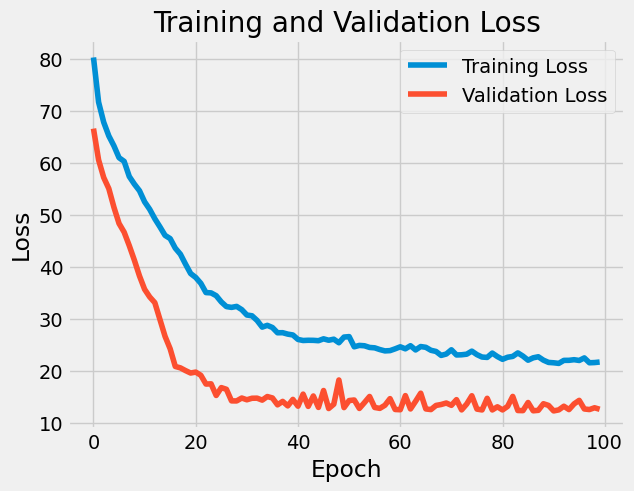

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

actual_values = []
predicted_values = []

# Iterate through each element in y_test and its corresponding prediction
for actual, prediction in zip(y_test.flatten(), predictions.flatten()):
    actual_values.append(actual)
    predicted_values.append(prediction)

# Create DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
print(comparison_df.head(len(predictions)))  # Display first 10 rows for comparison

62/62 [==============================] - 0s 2ms/step
         Actual  Predicted
0      8.330000   8.752692
1      9.710000   8.603840
2     10.000000   8.631536
3     11.260000   8.675278
4      7.140000   9.022707
...         ...        ...
1966  13.790000   9.155907
1967   6.660000   9.299349
1968   8.700000   9.194348
1969  18.870001   9.322686
1970   8.200000   9.287005

[1971 rows x 2 columns]


62/62 [==============================] - 0s 2ms/step


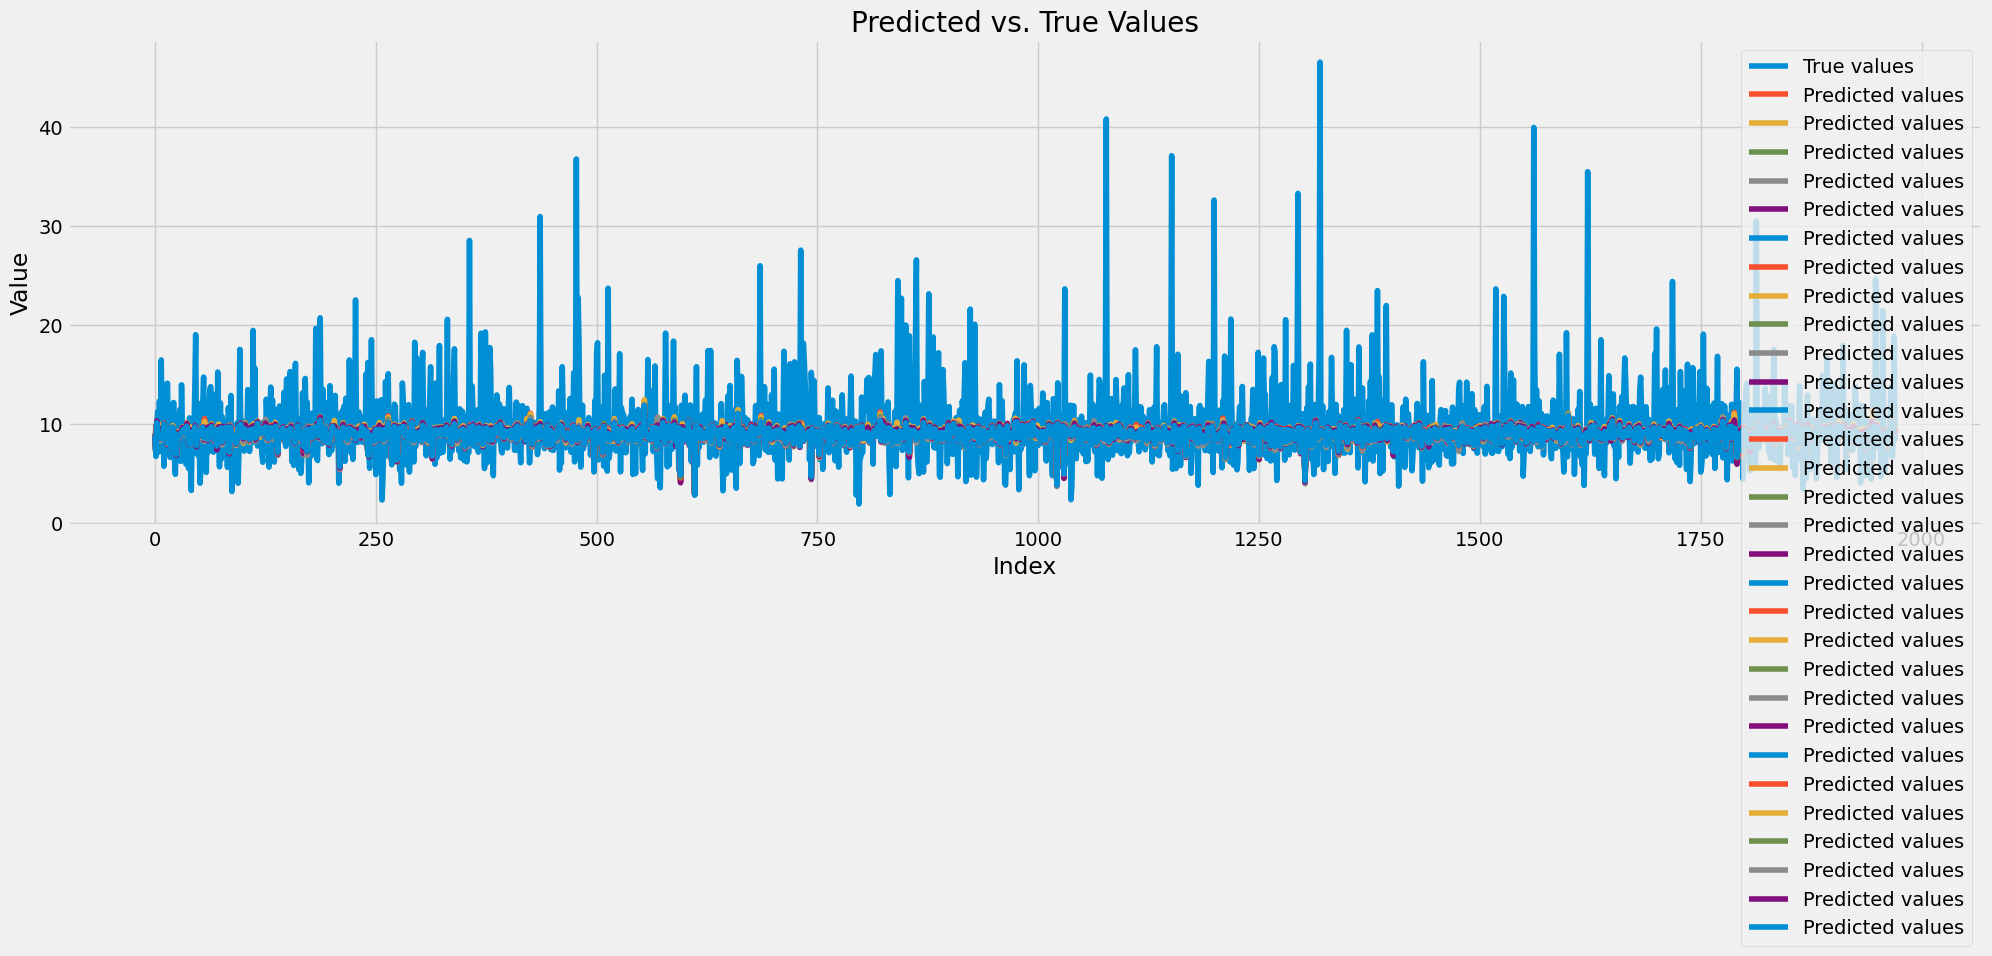

In [ ]:
predicted_values = model.predict(X_test)

# Nastavenie šírky a výšky grafu
plt.figure(figsize=(22, 6))

# Vykreslenie grafu predikovaných a skutočných hodnôt
plt.plot(y_test, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()